# DSML Project Phase 2:
# Project 6: Stocks Closing Price Prediciton using Machine Learning.


# Name: Shivam Shukla 
# Roll No: 19301

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv("stocknet_trn_data.csv")
df_target = pd.read_csv("stocknet_trn_data_targets.csv", header=None)
df_test = pd.read_csv("stocknet_tst_data.csv")


In [3]:
df_target.head()

,0,1
0,d1,75.650002
1,d2,124.449997
2,d3,82.660004
3,d4,57.009998
4,d5,47.860001


In [4]:
df.head()

,Open,High,Low,Volume
0,75.430000,75.910004,75.139999,3436700.0
1,124.930000,124.940002,124.169998,2366700.0
2,84.339996,84.370003,82.370003,11338700.0
3,56.770000,57.150002,56.529999,413300.0
4,47.419998,48.090000,46.759998,9531100.0


In [5]:
df.describe()

,Open,High,Low,Volume
count,97729.000000,97729.000000,97729.000000,9.772900e+04
mean,2427.661341,2439.557429,2413.965223,9.064781e+06
std,21797.841949,21900.340643,21678.006665,1.800910e+07
min,2.130000,2.280000,1.960000,0.000000e+00
25%,40.450001,40.730000,40.180000,1.198000e+06
50%,65.959999,66.489998,65.459999,3.544600e+06
75%,97.669998,98.470001,96.930000,8.996400e+06
max,272800.000000,272885.000000,271040.000000,6.166205e+08


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97732 entries, 0 to 97731
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    97729 non-null  float64
 1   High    97729 non-null  float64
 2   Low     97729 non-null  float64
 3   Volume  97729 non-null  float64
dtypes: float64(4)
memory usage: 3.0 MB


In [7]:
X = df
y= df_target.iloc[:,1]

In [8]:
#droping NULL values
X = X.dropna()
y = y.dropna()

In [9]:
print(X.shape,y.shape)

(97729, 4) (97729,)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state = 42)

In [11]:
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (78183, 4) (78183,)
Test (19546, 4) (19546,)


# Correlation Feature Selection

Feature 0: 1539337061.925623
Feature 1: 3601959825.537310
Feature 2: 3164765254.511551
Feature 3: 230.777136


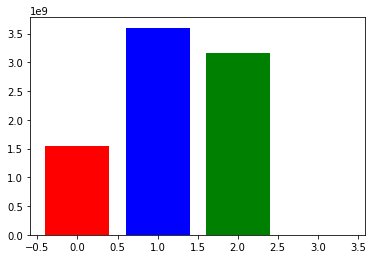

In [12]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,mutual_info_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs


X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_,color = ["red","blue","green","yellow"])
pyplot.show()

# Mutual Info Regression

Feature 0: 4.331421
Feature 1: 4.988335
Feature 2: 4.930521
Feature 3: 0.358829


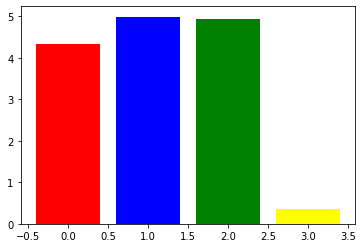

In [13]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs


X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_,color = ["red","blue","green","yellow"])
pyplot.show()

In [14]:
# X["Adj Close"].head()

In [15]:
y.head()

0     75.650002
1    124.449997
2     82.660004
3     57.009998
4     47.860001
Name: 1, dtype: float64

In [16]:
D = X.copy()
D["Closed Price"] = y

In [17]:
correlation = D.corr(method="pearson")

In [18]:
D.head()

,Open,High,Low,Volume,Closed Price
0,75.430000,75.910004,75.139999,3436700.0,75.650002
1,124.930000,124.940002,124.169998,2366700.0,124.449997
2,84.339996,84.370003,82.370003,11338700.0,82.660004
3,56.770000,57.150002,56.529999,413300.0,57.009998
4,47.419998,48.090000,46.759998,9531100.0,47.860001


In [19]:
print(correlation)

                  Open      High       Low    Volume  Closed Price
Open          1.000000  0.999988  0.999988 -0.054682      0.999974
High          0.999988  1.000000  0.999987 -0.054687      0.999989
Low           0.999988  0.999987  1.000000 -0.054680      0.999988
Volume       -0.054682 -0.054687 -0.054680  1.000000     -0.054684
Closed Price  0.999974  0.999989  0.999988 -0.054684      1.000000


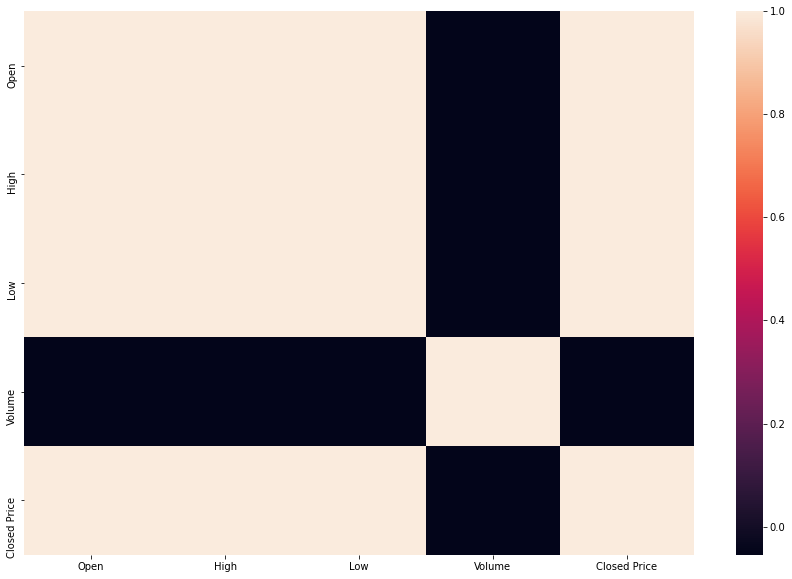

In [20]:
# from matplotlib.pyplot as plt
import seaborn as sns
pyplot.figure(figsize=(15,10))
plot = sns.heatmap(correlation)
pyplot.show()

In [21]:
Correlation_close = D.iloc[:,:5].corrwith(D["Closed Price"], axis="index", drop=False, method="pearson")

In [22]:
Correlation_close

Open            0.999974
High            0.999989
Low             0.999988
Volume         -0.054684
Closed Price    1.000000
dtype: float64

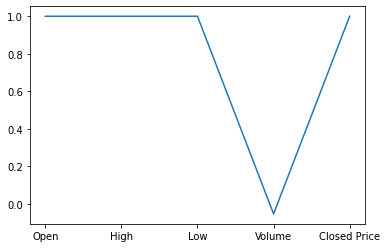

In [23]:
pyplot.plot(Correlation_close)

In [24]:
import matplotlib.pyplot as plt

In [25]:
X.describe()

,Open,High,Low,Volume
count,97729.000000,97729.000000,97729.000000,9.772900e+04
mean,2427.661341,2439.557429,2413.965223,9.064781e+06
std,21797.841949,21900.340643,21678.006665,1.800910e+07
min,2.130000,2.280000,1.960000,0.000000e+00
25%,40.450001,40.730000,40.180000,1.198000e+06
50%,65.959999,66.489998,65.459999,3.544600e+06
75%,97.669998,98.470001,96.930000,8.996400e+06
max,272800.000000,272885.000000,271040.000000,6.166205e+08


Text(0, 0.5, 'Closing Price')

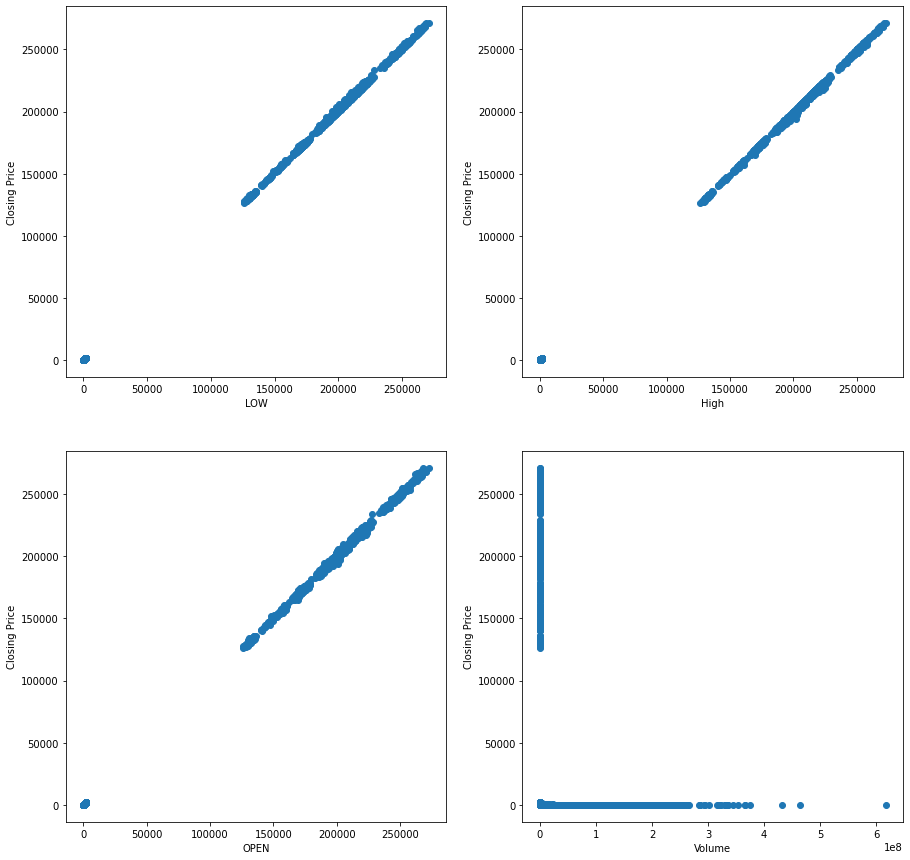

In [26]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.scatter(X["Low"],y)
plt.xlabel("LOW")
plt.ylabel("Closing Price")

plt.subplot(2,2,2)
plt.scatter(X["High"],y)
plt.xlabel("High")
plt.ylabel("Closing Price")

plt.subplot(2,2,3)
plt.scatter(X["Open"],y)
plt.xlabel("OPEN")
plt.ylabel("Closing Price")

plt.subplot(2,2,4)
plt.scatter(X["Volume"],y)
plt.xlabel("Volume")
plt.ylabel("Closing Price")

# plt.subplot(4,1,4)
# plt.scatter(X["Adj Close"],y)
# plt.xlabel("Adj Close")
# plt.ylabel("Closing Price")

Text(0, 0.5, 'Closing Price')

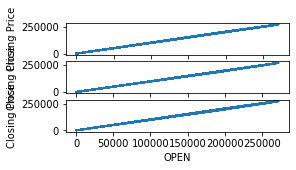

In [27]:
plt.figure(figsize=(4,2))
plt.subplot(3,1,1)
plt.plot(X["Low"],y)
plt.xlabel("LOW")
plt.ylabel("Closing Price")

plt.subplot(3,1,2)
plt.plot(X["High"],y)
plt.xlabel("High")
plt.ylabel("Closing Price")

plt.subplot(3,1,3)
plt.plot(X["Open"],y)
plt.xlabel("OPEN")
plt.ylabel("Closing Price")

# plt.subplot(4,1,4)
# plt.plot(X["Adj Close"],y)
# plt.xlabel("Adj Close")
# plt.ylabel("Closing Price")

# plt.subplot(2,2,(1,1))
# plt.plot(X["Volume"],y)



Text(0, 0.5, 'Closing Price')

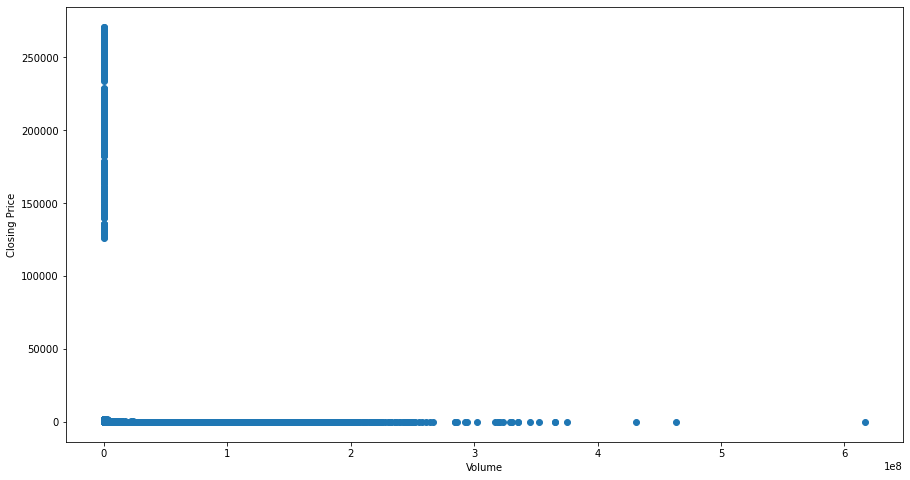

In [28]:
plt.figure(figsize=(15,8))
plt.scatter(X["Volume"],y)
plt.xlabel("Volume")
plt.ylabel("Closing Price")


In [29]:
df_test

,Open,High,Low,Volume
0,26.299999,26.520000,25.959999,32642100
1,95.550003,95.739998,94.019997,1826300
2,54.770000,55.360001,54.590000,5656800
3,125.589996,125.820000,123.660004,4151600
4,20.709999,20.809999,20.670000,10489800
...,...,...,...,...
10855,51.660000,52.919998,49.919998,87000
10856,39.549999,40.619999,39.189999,35177200
10857,22.780001,22.900000,22.389999,9404100
10858,33.750000,34.060001,33.580002,26179000


In [30]:
from sklearn.linear_model import LinearRegression
Linear = LinearRegression()
Linear.fit(X_train,y_train)

LinearRegression()

In [31]:
y_hat = Linear.predict(X_test)

In [32]:
error = np.sum(np.sqrt((y_hat - y_test)**2))/(X_test.shape[0])

In [33]:
error_squared = np.sum((y_hat - y_test)**2)/(X_test.shape[0])
error_squared

4234.895335745264

In [34]:
error

5.884667162421888

In [35]:
from sklearn.metrics import accuracy_score,mean_absolute_percentage_error
error_sc = mean_absolute_percentage_error(y_hat,y_test)
print(error_sc)

0.0036519629108196995


In [36]:
accuracy = 100 - sum(((abs(y_hat - y_test)/y_test)*100))/X_test.shape[0]

In [37]:
accuracy

99.63511744819286

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, median_absolute_error, r2_score, explained_variance_score
import numpy as np

def regression_report(y_true, y_pred):
    
    error = abs(y_true - y_pred)
    percentil = [5,25,50,75,95]
    percentil_value = np.percentile(error, percentil)
    
    metrics = [
        ('mean absolute error', mean_absolute_error(y_true, y_pred)),
        ('median absolute error', median_absolute_error(y_true, y_pred)),
        ('mean squared error', mean_squared_error(y_true, y_pred)),
        ('max error', max_error(y_true, y_pred)),
        ('r2 score', r2_score(y_true, y_pred)),
        ('explained variance score', explained_variance_score(y_true, y_pred)),
        ('mean absolute percentage error', mean_absolute_percentage_error(y_true, y_pred)),
#         ("score")
    ]
    
    print('Metrics for regression:')
    for metric_name, metric_value in metrics:
        print(f'{metric_name:>30s}: {metric_value: >20.5f}')
        
    print('\nPercentiles:')
    for p, pv in zip(percentil, percentil_value):
        print(f'{p: 25d}: {pv:>20.3f}')


In [39]:
regression_report(y_hat,y_test)

Metrics for regression:
           mean absolute error:              5.88467
         median absolute error:              0.16087
            mean squared error:           4234.89534
                     max error:           1958.21474
                      r2 score:              0.99999
      explained variance score:              0.99999
mean absolute percentage error:              0.00365

Percentiles:
                        5:                0.014
                       25:                0.071
                       50:                0.161
                       75:                0.333
                       95:                1.171


In [40]:
def linear(X_train,Y_train,X_test,y_test):

    Lr = LinearRegression()
    Lr.fit(X_train,y_train)
    y_hat = Lr.predict(X_test)
#     accuracy = (100 - sum(((abs(y_hat - y_test)/y_test)*100))/X_test.shape[0]) 
    regression_report(y_hat,y_test)
    print("Score = ",Lr.score(X_test,y_test)*100)
#     print("\nAccuracy = ",accuracy) 

In [41]:
 linear(X_train,y_train,X_test,y_test)

Metrics for regression:
           mean absolute error:              5.88467
         median absolute error:              0.16087
            mean squared error:           4234.89534
                     max error:           1958.21474
                      r2 score:              0.99999
      explained variance score:              0.99999
mean absolute percentage error:              0.00365

Percentiles:
                        5:                0.014
                       25:                0.071
                       50:                0.161
                       75:                0.333
                       95:                1.171
Score =  99.99912850197161


In [42]:
X

,Open,High,Low,Volume
0,75.430000,75.910004,75.139999,3436700.0
1,124.930000,124.940002,124.169998,2366700.0
2,84.339996,84.370003,82.370003,11338700.0
3,56.770000,57.150002,56.529999,413300.0
4,47.419998,48.090000,46.759998,9531100.0
...,...,...,...,...
97727,103.650002,103.809998,103.089996,3678200.0
97728,64.419998,64.730003,64.190002,20273100.0
97729,581.070007,581.400024,571.070007,3416500.0
97730,120.650002,120.650002,114.959999,13261700.0


In [43]:
#Regression with Single Variable
X_low = X[["Low","High"]]

In [44]:
# from sklearn.model_selection import train_test_split
X_low_train, X_low_test, y_low_train, y_low_test = train_test_split(X_low, y, test_size=0.20,random_state = 42)

In [45]:
linear(X_low_train,y_low_train,X_low_test,y_low_test)

Metrics for regression:
           mean absolute error:              8.13051
         median absolute error:              0.19267
            mean squared error:           8323.68127
                     max error:           2524.28317
                      r2 score:              0.99998
      explained variance score:              0.99998
mean absolute percentage error:              0.00437

Percentiles:
                        5:                0.016
                       25:                0.083
                       50:                0.193
                       75:                0.405
                       95:                1.426
Score =  99.99828707176005


In [46]:
#Regression with Single Variable
X_Open = X[["Open","High"]]

In [47]:
# from sklearn.model_selection import train_test_split
X_open_train, X_open_test, y_open_train, y_open_test = train_test_split(X_Open, y, test_size=0.20,random_state = 42)

In [48]:
linear(X_open_train,y_open_train,X_open_test,y_open_test)

Metrics for regression:
           mean absolute error:              8.59413
         median absolute error:              0.45207
            mean squared error:          10085.55559
                     max error:           3652.66077
                      r2 score:              0.99998
      explained variance score:              0.99998
mean absolute percentage error:              0.00920

Percentiles:
                        5:                0.066
                       25:                0.283
                       50:                0.452
                       75:                0.612
                       95:                1.558
Score =  99.99792449609431


In [49]:
from sklearn.metrics import mean_absolute_percentage_error

In [50]:
X_3 = X[["Open","High","Low"]]

In [51]:
# from sklearn.model_selection import train_test_split
X_open_train, X_open_test, y_open_train, y_open_test = train_test_split(X_3, y, test_size=0.20,random_state = 42)

In [52]:
linear(X_open_train,y_open_train,X_open_test,y_open_test)

Metrics for regression:
           mean absolute error:              5.88444
         median absolute error:              0.16086
            mean squared error:           4234.89584
                     max error:           1958.21532
                      r2 score:              0.99999
      explained variance score:              0.99999
mean absolute percentage error:              0.00364

Percentiles:
                        5:                0.014
                       25:                0.070
                       50:                0.161
                       75:                0.332
                       95:                1.171
Score =  99.99912850186864


In [53]:
X_4 = X[["Low","Volume"]]

In [54]:
# from sklearn.model_selection import train_test_split
X_open_train, X_open_test, y_open_train, y_open_test = train_test_split(X_4, y, test_size=0.20,random_state = 42)

In [55]:
linear(X_open_train,y_open_train,X_open_test,y_open_test)

Metrics for regression:
           mean absolute error:              9.43996
         median absolute error:              0.50234
            mean squared error:          10934.35806
                     max error:           3250.19844
                      r2 score:              0.99998
      explained variance score:              0.99998
mean absolute percentage error:              0.00997

Percentiles:
                        5:                0.069
                       25:                0.302
                       50:                0.502
                       75:                0.695
                       95:                1.544
Score =  99.99774982125084


In [56]:
X_train

,Open,High,Low,Volume
74419,72.070000,72.589996,71.480003,139800.0
74101,302.600006,305.600006,300.750000,3509900.0
47249,135.940002,137.190002,135.270004,1221900.0
29691,70.849998,71.989998,70.320000,1683000.0
26840,102.199997,102.300003,101.660004,5418100.0
...,...,...,...,...
6265,732.010010,737.747009,731.000000,1594900.0
54888,136.259995,137.429993,136.009995,2505000.0
76823,98.942810,99.111908,97.908318,2570600.0
860,76.010002,76.599998,75.639999,3855100.0


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble  import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

In [62]:
def model_fitting_report(model,X,y,X_train,Y_train,X_test,y_test):
    
    model.fit(X_train,y_train)
    y_hat = model.predict(X_test)
    regression_report(y_hat,y_test)
    print("-----------------------------------------------------------------------------------------------------------------")
#     print("Accuracy Score = ",np.mean(cross_val_score(model,X,y,cv=5)))


In [130]:


def Regression(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.20,random_state = 42)
    lr = LinearRegression()
    dtr = DecisionTreeRegressor()
    rfr = RandomForestRegressor()
    knr = KNeighborsRegressor()
    NN = MLPRegressor(hidden_layer_sizes=[100,50,15],
                     activation="tanh",
                     alpha=0.001,
                     learning_rate_init=0.01)
    svr = SVR()
    
    print("\nRegression_Report for Linear Regression------------------------------->\n")
    model_fitting_report(lr, X, y, X_train, y_train, X_test, y_test)
    print("-----------------------------------------------------------------------------------------------------------------")
    print("-----------------------------------------------------------------------------------------------------------------")
    
    print("\nRegression_Report for Decision Tree Regression------------------------>\n")
    model_fitting_report(dtr, X, y, X_train, y_train, X_test, y_test)
    print("-----------------------------------------------------------------------------------------------------------------")
    print("-----------------------------------------------------------------------------------------------------------------")
    
    print("\nRegression_Report for Random Forest Regression------------------------>\n")
    model_fitting_report(rfr, X, y, X_train, y_train, X_test, y_test)
    print("-----------------------------------------------------------------------------------------------------------------")
    print("-----------------------------------------------------------------------------------------------------------------")
    
    print("\nRegression_Report for K-Neighbour Regression-------------------------->\n")
    model_fitting_report(knr, X, y, X_train, y_train, X_test, y_test)
    print("-----------------------------------------------------------------------------------------------------------------")
    print("-----------------------------------------------------------------------------------------------------------------")
    
    print("\nRegression_Report for Artificial Neural Networks(NN)------------------>\n")
    model_fitting_report(NN, X, y, X_train, y_train, X_test, y_test)
    print("-----------------------------------------------------------------------------------------------------------------")
    print("-----------------------------------------------------------------------------------------------------------------")
    

    
    
    
    

In [120]:
Regression(X,y)


Regression_Report for Linear Regression------------------------------->

Metrics for regression:
           mean absolute error:              5.88467
         median absolute error:              0.16087
            mean squared error:           4234.89534
                     max error:           1958.21474
                      r2 score:              0.99999
      explained variance score:              0.99999
mean absolute percentage error:              0.00365

Percentiles:
                        5:                0.014
                       25:                0.071
                       50:                0.161
                       75:                0.333
                       95:                1.171
-----------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------
-------------------------------------------------

In [70]:
#Chossing two variable only at a time
X1 = X[["Open","Low"]]
X2 = X[["Open","High"]]
X3 = X[["High","Volume"]]
X4 = X[["Low","High"]]

In [71]:
Regression(X1,y) # X1 = X[["Open","Low"]]


Regression_Report for Linear Regression------------------------------->

Metrics for regression:
           mean absolute error:                9.285
         median absolute error:                0.511
            mean squared error:            10592.362
                     max error:             3189.882
                      r2 score:                1.000
      explained variance score:                1.000
mean absolute percentage error:                0.010

Percentiles:
                        5:                0.076
                       25:                0.323
                       50:                0.511
                       75:                0.684
                       95:                1.544
-----------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------
-------------------------------------------------

/home/iiserb/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Metrics for regression:
           mean absolute error:             4012.356
         median absolute error:             1700.944
            mean squared error:        486436103.712
                     max error:           266774.756
                      r2 score: -7407925060713745310804033010663424.000
      explained variance score: -7400261245519197412645392072310784.000
mean absolute percentage error:                2.273

Percentiles:
                        5:             1584.679
                       25:             1670.104
                       50:             1700.944
                       75:             1726.014
                       95:             1749.094
-----------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------

In [72]:
Regression(X2,y) # X2 = X[["Open","High"]]


Regression_Report for Linear Regression------------------------------->

Metrics for regression:
           mean absolute error:                8.594
         median absolute error:                0.452
            mean squared error:            10085.556
                     max error:             3652.661
                      r2 score:                1.000
      explained variance score:                1.000
mean absolute percentage error:                0.009

Percentiles:
                        5:                0.066
                       25:                0.283
                       50:                0.452
                       75:                0.612
                       95:                1.558
-----------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------
-------------------------------------------------

/home/iiserb/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Metrics for regression:
           mean absolute error:             3306.336
         median absolute error:              972.520
            mean squared error:        488000198.490
                     max error:           267503.185
                      r2 score: -2449555126181135684806000454402048.000
      explained variance score: -2439177983022565104591202766815232.000
mean absolute percentage error:                3.189

Percentiles:
                        5:              857.203
                       25:              941.688
                       50:              972.520
                       75:              997.585
                       95:             1020.665
-----------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------

In [73]:
Regression(X3,y) # X3 = X[["High","Volume"]]


Regression_Report for Linear Regression------------------------------->

Metrics for regression:
           mean absolute error:                8.923
         median absolute error:                0.426
            mean squared error:            10754.695
                     max error:             3721.953
                      r2 score:                1.000
      explained variance score:                1.000
mean absolute percentage error:                0.009

Percentiles:
                        5:                0.056
                       25:                0.256
                       50:                0.426
                       75:                0.605
                       95:                1.589
-----------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------
-------------------------------------------------

KeyboardInterrupt: 

In [ ]:
Regression(X4,y) # X4 = X[["Low","High"]]

In [ ]:
rgg = Stock_Regression(rgg_opt="lr", selected_features=None)
rgg.regression()

c:\users\sashu\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


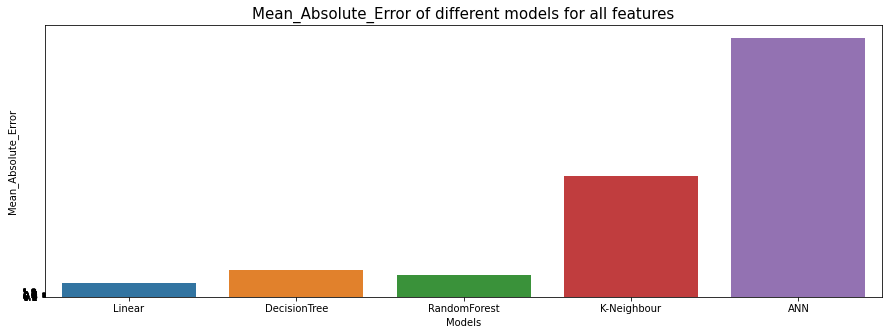

In [56]:
models = ['Linear', 'DecisionTree', 'RandomForest', 'K-Neighbour', 'ANN']
error = [5.885,
11.238,
8.978,
50.828,
108.657,]
# Visualizing the accuracy of all the classification models applied
plt.figure(figsize=(15,5))
plt.title('Mean_Absolute_Error of different models for all features', fontsize=15)
plt.yticks(np.arange(0, 2, 0.1))
plt.ylabel("Mean_Absolute_Error")
plt.xlabel("Models")
sns.barplot(models, error)
plt.show()

c:\users\sashu\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


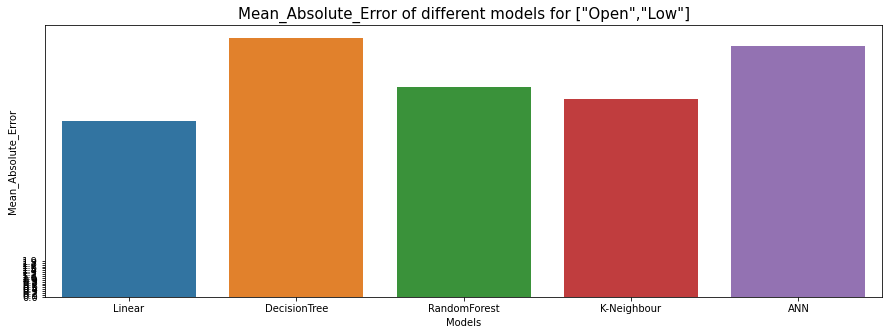

In [57]:
models = ['Linear', 'DecisionTree', 'RandomForest', 'K-Neighbour', 'ANN']
error = [9.285,
13.671,
11.059,
10.469,
13.23,]
# Visualizing the accuracy of all the classification models applied
plt.figure(figsize=(15,5))
plt.title('Mean_Absolute_Error of different models for ["Open","Low"]', fontsize=15)
plt.yticks(np.arange(0, 2, 0.1))
plt.ylabel("Mean_Absolute_Error")
plt.xlabel("Models")
sns.barplot(models, error)
plt.show()

c:\users\sashu\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


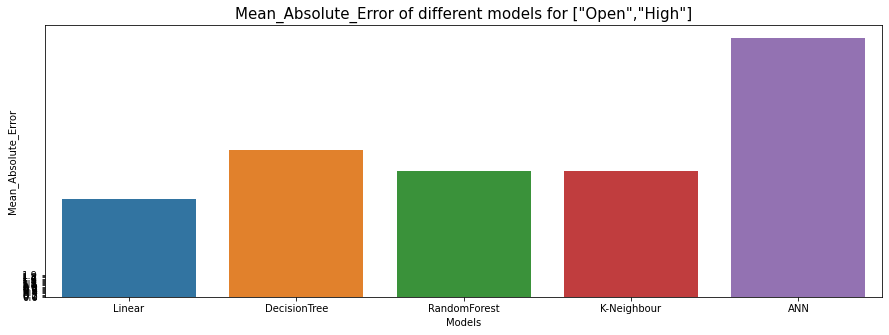

In [58]:
models = ['Linear', 'DecisionTree', 'RandomForest', 'K-Neighbour', 'ANN']
error = [8.594,
12.891,
11.058,
11.017,
22.749,]
# Visualizing the accuracy of all the classification models applied
plt.figure(figsize=(15,5))
plt.title('Mean_Absolute_Error of different models for ["Open","High"]', fontsize=15)
plt.yticks(np.arange(0, 2, 0.1))
plt.ylabel("Mean_Absolute_Error")
plt.xlabel("Models")
sns.barplot(models, error)
plt.show()

c:\users\sashu\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Mean_Absolute_Error of different models for ["High","Volume"]'}, xlabel='Models', ylabel='Mean_Absolute_Error'>

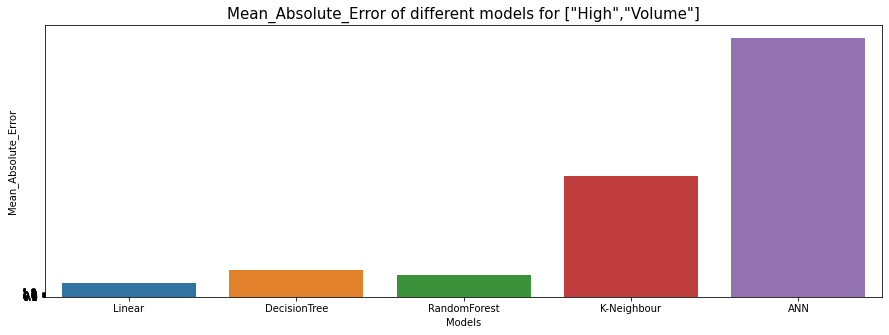

In [60]:
models = ['Linear', 'DecisionTree', 'RandomForest', 'K-Neighbour', 'ANN']
error = [5.885,
11.238,
8.978,
50.828,
108.657,]
# Visualizing the accuracy of all the classification models applied
plt.figure(figsize=(15,5))
plt.title('Mean_Absolute_Error of different models for ["High","Volume"]', fontsize=15)
plt.yticks(np.arange(0, 2, 0.1))
plt.ylabel("Mean_Absolute_Error")
plt.xlabel("Models")
sns.barplot(models, error)

c:\users\sashu\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


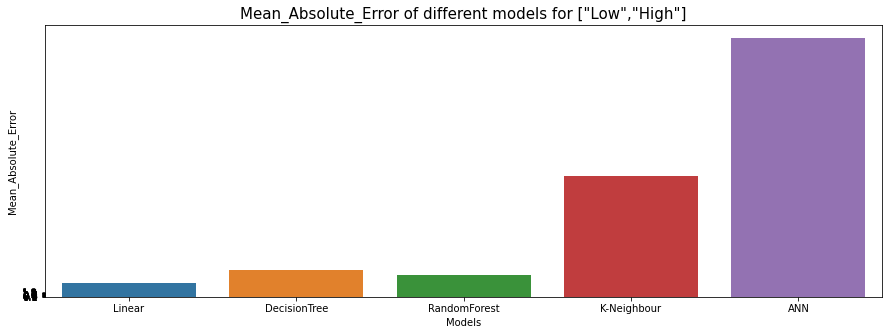

In [61]:
models = ['Linear', 'DecisionTree', 'RandomForest', 'K-Neighbour', 'ANN']
error = [5.885,
11.238,
8.978,
50.828,
108.657,]
# Visualizing the accuracy of all the classification models applied
plt.figure(figsize=(15,5))
plt.title('Mean_Absolute_Error of different models for ["Low","High"]', fontsize=15)
plt.yticks(np.arange(0, 2, 0.1))
plt.ylabel("Mean_Absolute_Error")
plt.xlabel("Models")
sns.barplot(models, error)
plt.show()

In [80]:
X

,Open,High,Low,Volume
0,75.430000,75.910004,75.139999,3436700.0
1,124.930000,124.940002,124.169998,2366700.0
2,84.339996,84.370003,82.370003,11338700.0
3,56.770000,57.150002,56.529999,413300.0
4,47.419998,48.090000,46.759998,9531100.0
...,...,...,...,...
97727,103.650002,103.809998,103.089996,3678200.0
97728,64.419998,64.730003,64.190002,20273100.0
97729,581.070007,581.400024,571.070007,3416500.0
97730,120.650002,120.650002,114.959999,13261700.0


In [121]:
D = X.iloc[:,:3]

In [123]:
D = np.array(D)
D.reshape(len(D),3)

array([[ 75.43    ,  75.910004,  75.139999],
       [124.93    , 124.940002, 124.169998],
       [ 84.339996,  84.370003,  82.370003],
       ...,
       [581.070007, 581.400024, 571.070007],
       [120.650002, 120.650002, 114.959999],
       [ 64.870003,  64.959999,  64.309998]])

In [124]:
D = pd.DataFrame(D)

In [125]:
D.shape

(97729, 3)

In [126]:
L.fit(D,y)

LinearRegression()

In [127]:
Regression(D,y)


Regression_Report for Linear Regression------------------------------->

Metrics for regression:
           mean absolute error:              5.88444
         median absolute error:              0.16086
            mean squared error:           4234.89584
                     max error:           1958.21532
                      r2 score:              0.99999
      explained variance score:              0.99999
mean absolute percentage error:              0.00364

Percentiles:
                        5:                0.014
                       25:                0.070
                       50:                0.161
                       75:                0.332
                       95:                1.171
-----------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------
-------------------------------------------------

In [129]:
from sklearn.svm import SVR 

In [131]:
Regression(X,y)



Regression_Report for Linear Regression------------------------------->

Metrics for regression:
           mean absolute error:           2432.47491
         median absolute error:             23.46529
            mean squared error:      491725483.49312
                     max error:         268472.08624
                      r2 score:       -2205583.53512
      explained variance score:       -2179565.40233
mean absolute percentage error:             35.89380

Percentiles:
                        5:                1.771
                       25:                9.283
                       50:               23.465
                       75:               44.830
                       95:              179.555
-----------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------
-------------------------------------------------

# Pipe Preparation for HyperParameter Tuning and Training

<hr><font color="green"><h1>from file: B_DTR_pipeline-Copy4</h1></font>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, median_absolute_error, r2_score, explained_variance_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble  import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
class Stock_Regression():
    def __init__(self,
                 path = "D:\\A_Semester_6\\dataScienceAndMachineLearning\\Project_Phase_2\\",
                 rgg_opt = "lr",
                 selected_features = None,
                ):
        self.path = path
        self.rgg_opt = rgg_opt
        self.selected_features = selected_features
        if selected_features == None:
            self.no_of_selected_features = ["Open", "High", "Low", "Volume"]

            # Selection regressor
    def regression_pipeline(self):
        # Linear Regression
        if self.rgg_opt == "lr":
            print("\n\t### Training Linear Regression\t###\n")
            rgg = LinearRegression(normalize=False, copy_X=True)
            rgg_parameters = {
                "normalize":(True, False),
                "copy_X":(True, False),
            }
        
        # Decision Tree Regression:
        elif self.rgg_opt == "dtr":
            print("\n\t### Training the Decision Tree Regressor\t ###\n")
            rgg = DecisionTreeRegressor(criterion="absolute_error",splitter="best")
            rgg_parameters = {
                "splitter":("best","random"),
#                 "max_features":("auto","sqrt","log2"),
#                 "max_depth":(10,40,45,60),
#                 "max_depth":(2,4,6,8,10),
                "max_depth":(9,10,11),
                
#                 "ccp_alpha":(0.009,0.01,0.05,0.1),
#                 "ccp_alpha":(0.0009,0.002,0.005,0.006,0.009)
                "ccp_alpha":(0.00009,0.0005,0.0009)
            }
        
        
        # Random Forest Regression
        elif self.rgg_opt == "rfr":
            print("\n\t ### Traing the Random Forest Regressor \t###\n")
            rgg = RandomForestRegressor(n_estimators=100, max_features=None)
            rgg_parameters = {
                "n_estimators":(30,50,70,90,100,200,400),
                "max_depth":(10,20,30,50,100,200),
                "ccp_alpha":(0.009,0.01,0.05,0.1),
            }
            
        # Support Vector Machine Regression:
        elif self.rgg_opt == "svr":
            print("\n\t ### Training the Support Vector Regressor \t###\n")
            rgg = SVR(kernel="linear", gamma=0.1)
            rgg_parameters = {
                "kernel":("linear","rgb","poly","sigmoid"),
                "C":(0.1,100,1000),
#                 ""
                
            }
        # K-Neighbors Regresssion
        elif self.rgg_opt == "knn":
            print("\n\t### Training the K-N Regressor \t###\n")
            rgg = KNeighborsRegressor(weights="uniform")
            rgg_parameters = {
                "n_neighbors":(3,5,10,20,40,80),
                "algorithm":("auto", "ball_tree", "kd_tree", "brute"),
                "leaf_size":(20,30,40,60,100),
            }
        # Artificial Neural Network
        elif self.rgg_opt == "ann":
            print("\n\t### Training the Artificial Neural Networks \t###\n")
            rgg = MLPRegressor(hidden_layer_sizes=[50,10,25,10],activation="tanh",alpha=0.001,learning_rate_init=0.01)
            rgg_parameters = {
                "hidden_layer_sizes":([10,5,10],[100,75,25,75,25],[25,20,12,20,10],[100,50,15]),
                "activation":("relu","logistic","tanh","identity"),
                "solver":("sgd","adam","lbfgs"),
                "alpha":(0.0001,0.001,0.01,0.05),
#                 ""
            }
        else:
            print("\n\t Select the Valid ### \n")
        return rgg,rgg_parameters

# Load and prepare the data set:
    def get_data(self):
        df_train_data = pd.read_csv("stocknet_trn_data.csv")
        df_train_target = pd.read_csv("stocknet_trn_data_targets.csv", header=None)
        df_train_data = df_train_data.dropna()
        df_train_target = df_train_target.dropna()
#         df_train_data = df_train_data.loc[:,self.selected_features]
        
        df_train_target = df_train_target.iloc[:,1]
        df_train_target.columns = ["Closed_Price"]
        feature_names = df_train_data.columns
        print("\nFeatures Selected for training:-->\t", feature_names)
        
        # Training and test Split
        X_train, X_test, y_train, y_test = train_test_split(df_train_data,df_train_target, test_size=0.10, random_state=43)
        
        return X_train, X_test, y_train, y_test
    
    
    def regression_report(self,y_true, y_pred):
        
#         mean_absolute_percentage_error = (np.sum((y_true -y_pred)/y_true))/y_true.shape[0]
    
        error = abs(y_true - y_pred)
        percentil = [5,25,50,75,95]
        percentil_value = np.percentile(error, percentil)

        metrics = [
            ('mean absolute error', mean_absolute_error(y_pred,y_true)),
            ('median absolute error', median_absolute_error(y_true, y_pred)),
            ('mean squared error', mean_squared_error(y_true, y_pred)),
            ('max error', max_error(y_true, y_pred)),
            ('r2 score', r2_score(y_true, y_pred)),
            ('explained variance score', explained_variance_score(y_true, y_pred)),
            ('mean absolute percentage error', mean_absolute_percentage_error(y_true,y_pred)),
        ]

        print('Metrics for regression:')
        for metric_name, metric_value in metrics:
            print(f'{metric_name:>30s}: {metric_value: >20.6}')

        print('\nPercentiles:')

        for p, pv in zip(percentil, percentil_value):
            print(f'{p: 25d}: {pv:>20.3f}')

        
    def regression(self):
        
        
        rgg,rgg_parameters = self.regression_pipeline()

        X_train, X_test, y_train, y_test = self.get_data()

        grid_rgg = GridSearchCV(rgg,
                                param_grid=rgg_parameters,
                               scoring="neg_mean_absolute_percentage_error",
                               cv= 10,
                               )
        grid_rgg.fit(X_train,y_train)

        best_estimator = grid_rgg.best_estimator_
        best_param = grid_rgg.best_params_
        best_score = grid_rgg.best_score_

        print("Optimal Score = ", best_score)
        print("\nThe best set of estimator is ", best_estimator)
        print("\nThe best set of Parameter for the given model are:\n", best_param)


        #Evaluation
        y_test_predicted = grid_rgg.predict(X_test)
        print("\nThe Regression Report:------------>\n")
        self.regression_report(y_test,y_test_predicted)

        
        
        
        
        
        

    

        
        
            
            
            
            
            
            
            
            
            

# Hyper Parameter Tuning of Linear regression

In [3]:
rgg = Stock_Regression(rgg_opt="lr", selected_features=None)
rgg.regression()


	### Training Linear Regression	###


Features Selected for training:-->	 Index(['Open', 'High', 'Low', 'Volume'], dtype='object')
Optimal Score =  -0.0037016202268986137

The best set of estimator is  LinearRegression(normalize=True)

The best set of Parameter for the given model are:
 {'copy_X': True, 'normalize': True}

The Regression Report:------------>

Metrics for regression:
           mean absolute error:                6.965
         median absolute error:                0.162
            mean squared error:             5025.077
                     max error:             1952.781
                      r2 score:                1.000
      explained variance score:                1.000
mean absolute percentage error:                0.004

Percentiles:
                        5:                0.013
                       25:                0.071
                       50:                0.162
                       75:                0.342
                       95:          

# Hyper Parameter Tuning of Decision Tree Regressor

In [4]:
S = time()
rgg = Stock_Regression(rgg_opt="dtr", selected_features=None)
rgg.regression()
E = time()
print("\nTime Taken",(E-S)/3600)


	### Training the Decision Tree Regressor	 ###


Features Selected for training:-->	 Index(['Open', 'High', 'Low', 'Volume'], dtype='object')
Optimal Score =  -0.007757972286812118

The best set of estimator is  DecisionTreeRegressor(ccp_alpha=0.0009, criterion='absolute_error',
                      max_depth=10)

The best set of Parameter for the given model are:
 {'ccp_alpha': 0.0009, 'max_depth': 10, 'splitter': 'best'}

The Regression Report:------------>

Metrics for regression:
           mean absolute error:              10.2586
         median absolute error:                 0.33
            mean squared error:              12308.7
                     max error:               3474.0
                      r2 score:             0.999978
      explained variance score:             0.999978
mean absolute percentage error:           0.00786697

Percentiles:
                        5:                0.030
                       25:                0.150
                       50:  

In [5]:
(E-S)/3600

11.222512562804752

In [6]:
S = time()
rgg = Stock_Regression(rgg_opt="dtr", selected_features=None)
rgg.regression()
E = time()
print("\nTime Taken",(E-S)/3600," hrs")


	### Training the Decision Tree Regressor	 ###


Features Selected for training:-->	 Index(['Open', 'High', 'Low', 'Volume'], dtype='object')
Optimal Score =  -0.00775769796467281

The best set of estimator is  DecisionTreeRegressor(ccp_alpha=0.0009, criterion='absolute_error',
                      max_depth=10)

The best set of Parameter for the given model are:
 {'ccp_alpha': 0.0009, 'max_depth': 10, 'splitter': 'best'}

The Regression Report:------------>

Metrics for regression:
           mean absolute error:              10.7319
         median absolute error:                 0.33
            mean squared error:              13106.8
                     max error:               3335.0
                      r2 score:             0.999976
      explained variance score:             0.999976
mean absolute percentage error:            0.0078696

Percentiles:
                        5:                0.030
                       25:                0.150
                       50:   

In [4]:
rgg = Stock_Regression(rgg_opt="dtr", selected_features=None)
rgg.regression()


	### Training the Decision Tree Regressor	 ###


Features Selected for training:-->	 Index(['Open', 'High', 'Low', 'Volume'], dtype='object')
Optimal Score =  -0.012212219646733828

The best set of estimator is  DecisionTreeRegressor(ccp_alpha=0.009, max_depth=10, max_features='auto')

The best set of Parameter for the given model are:
 {'ccp_alpha': 0.009, 'max_depth': 10, 'max_features': 'auto', 'splitter': 'best'}

The Regression Report:------------>

Metrics for regression:
           mean absolute error:               11.109
         median absolute error:                0.527
            mean squared error:            14409.843
                     max error:             4355.625
                      r2 score:                1.000
      explained variance score:                1.000
mean absolute percentage error:                0.012

Percentiles:
                        5:                0.050
                       25:                0.257
                       50:         

# KNN Hyperparameter - Tuning

In [5]:
rgg = Stock_Regression(rgg_opt="knn", selected_features=None)
rgg.regression()


	### Training the K-N Regressor 	###


Features Selected for training:-->	 Index(['Open', 'High', 'Low', 'Volume'], dtype='object')
Optimal Score =  -0.5376312687610004

The best set of estimator is  KNeighborsRegressor(leaf_size=20, n_neighbors=3)

The best set of Parameter for the given model are:
 {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 3}

The Regression Report:------------>

Metrics for regression:
           mean absolute error:               48.013
         median absolute error:               21.460
            mean squared error:            24126.376
                     max error:             5746.667
                      r2 score:                1.000
      explained variance score:                1.000
mean absolute percentage error:                0.534

Percentiles:
                        5:                1.469
                       25:                9.187
                       50:               21.460
                       75:               41.500
 

In [7]:
from time import time

In [8]:


start = time()
rgg = Stock_Regression(rgg_opt="knn", selected_features=None)
rgg.regression()
end= time()

T = end - start


	### Training the K-N Regressor 	###


Features Selected for training:-->	 Index(['Open', 'High', 'Low', 'Volume'], dtype='object')
Optimal Score =  -0.5376312687610004

The best set of estimator is  KNeighborsRegressor(leaf_size=20, n_neighbors=3)

The best set of Parameter for the given model are:
 {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 3}

The Regression Report:------------>

Metrics for regression:
           mean absolute error:               48.013
         median absolute error:               21.460
            mean squared error:            24126.376
                     max error:             5746.667
                      r2 score:                1.000
      explained variance score:                1.000
mean absolute percentage error:                0.534

Percentiles:
                        5:                1.469
                       25:                9.187
                       50:               21.460
                       75:               41.500
 

In [9]:
T

4872.159919500351

In [12]:
start = time()
rgg = Stock_Regression(rgg_opt="knn", selected_features=None)
rgg.regression()
end= time()

T = end - start


	### Training the K-N Regressor 	###


Features Selected for training:-->	 Index(['Open', 'High', 'Low', 'Volume'], dtype='object')
Optimal Score =  -0.5132508026919248

The best set of estimator is  KNeighborsRegressor(leaf_size=25, n_neighbors=1)

The best set of Parameter for the given model are:
 {'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 1}

The Regression Report:------------>

Metrics for regression:
           mean absolute error:            47.317512
         median absolute error:            19.989998
            mean squared error:         24237.437284
                     max error:          5780.000000
                      r2 score:             0.999956
      explained variance score:             0.999957
mean absolute percentage error:             0.500358

Percentiles:
                        5:                0.970
                       25:                7.025
                       50:               19.990
                       75:               43.600
 

In [13]:
T

1716.3815698623657

In [14]:
start = time()
rgg = Stock_Regression(rgg_opt="knn", selected_features=None)
rgg.regression()
end= time()

T = end - start


	### Training the K-N Regressor 	###


Features Selected for training:-->	 Index(['Open', 'High', 'Low', 'Volume'], dtype='object')
Optimal Score =  -0.5132508026919248

The best set of estimator is  KNeighborsRegressor(leaf_size=25, n_neighbors=1)

The best set of Parameter for the given model are:
 {'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 1}

The Regression Report:------------>

Metrics for regression:
           mean absolute error:            47.317512
         median absolute error:            19.989998
            mean squared error:         24237.437284
                     max error:          5780.000000
                      r2 score:             0.999956
      explained variance score:             0.999957
mean absolute percentage error:             0.500358

Percentiles:
                        5:                0.970
                       25:                7.025
                       50:               19.990
                       75:               43.600
 

In [11]:
start = time()
rgg = Stock_Regression(rgg_opt="knn", selected_features=None)
rgg.regression()
end= time()

T = end - start
print("Time = ", T/3600 ,"hrs")


	### Training the K-N Regressor 	###


Features Selected for training:-->	 Index(['Open', 'High', 'Low', 'Volume'], dtype='object')
Optimal Score =  -0.5132508024756615

The best set of estimator is  KNeighborsRegressor(leaf_size=5, n_neighbors=1)

The best set of Parameter for the given model are:
 {'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 1}

The Regression Report:------------>

Metrics for regression:
           mean absolute error:            47.317512
         median absolute error:            19.989998
            mean squared error:         24237.437284
                     max error:          5780.000000
                      r2 score:             0.999956
      explained variance score:             0.999957
mean absolute percentage error:             0.500358

Percentiles:
                        5:                0.970
                       25:                7.025
                       50:               19.990
                       75:               43.600
   

In [4]:
start = time()
rgg = Stock_Regression(rgg_opt="knn", selected_features=None)
rgg.regression()
end= time()

T = end - start
print("Time = ", T/3600 ,"hrs")


	### Training the K-N Regressor 	###


Features Selected for training:-->	 Index(['Open', 'High', 'Low', 'Volume'], dtype='object')
Optimal Score =  -0.5132508024756615

The best set of estimator is  KNeighborsRegressor(leaf_size=1, n_neighbors=1)

The best set of Parameter for the given model are:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 1}

The Regression Report:------------>

Metrics for regression:
           mean absolute error:            47.317512
         median absolute error:            19.989998
            mean squared error:         24237.437284
                     max error:          5780.000000
                      r2 score:             0.999956
      explained variance score:             0.999957
mean absolute percentage error:             0.500358

Percentiles:
                        5:                0.970
                       25:                7.025
                       50:               19.990
                       75:               43.600
   

# Hyper Parameter Tuning of Artificial Neural Networks

In [24]:
from time import time

In [26]:
print("Time = ", T/3600 ,"hrs")start =  time()
rgg = Stock_Regression(rgg_opt="ann", selected_features=None)
rgg.regression()
end = time()
T = end - start


	### Training the Artificial Neural Networks 	###


Features Selected for training:-->	 Index(['Open', 'High', 'Low', 'Volume'], dtype='object')
Optimal Score =  -0.8126959986927549

The best set of estimator is  MLPRegressor(alpha=0.001, hidden_layer_sizes=[45, 25, 15],
             learning_rate_init=0.01)

The best set of Parameter for the given model are:
 {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': [45, 25, 15]}

The Regression Report:------------>

Metrics for regression:
           mean absolute error:              104.029
         median absolute error:               46.891
            mean squared error:            96644.995
                     max error:             4902.379
                      r2 score:                1.000
      explained variance score:                1.000
mean absolute percentage error:                0.654

Percentiles:
                        5:                3.259
                       25:               21.441
                  

In [5]:
start =  time()
rgg = Stock_Regression(rgg_opt="ann", selected_features=None)
rgg.regression()
end = time()
T = end - start
print("Time = ", T/3600 ,"hrs")


	### Training the Artificial Neural Networks 	###


Features Selected for training:-->	 Index(['Open', 'High', 'Low', 'Volume'], dtype='object')
Optimal Score =  -0.7812614658867773

The best set of estimator is  MLPRegressor(alpha=0.03, hidden_layer_sizes=[35, 20, 10],
             learning_rate_init=0.01)

The best set of Parameter for the given model are:
 {'alpha': 0.03, 'hidden_layer_sizes': [35, 20, 10]}

The Regression Report:------------>

Metrics for regression:
           mean absolute error:           106.132800
         median absolute error:            65.812682
            mean squared error:         51183.015257
                     max error:          4113.109006
                      r2 score:             0.999908
      explained variance score:             0.999923
mean absolute percentage error:             0.973749

Percentiles:
                        5:            16.533291
                       25:            40.367289
                       50:            65.8

In [3]:
start =  time()
rgg = Stock_Regression(rgg_opt="ann", selected_features=None)
rgg.regression()
end = time()
T = end - start
print("Time = ", T/3600 ,"hrs")


	### Training the Artificial Neural Networks 	###


Features Selected for training:-->	 Index(['Open', 'High', 'Low', 'Volume'], dtype='object')
Optimal Score =  -0.769148792079948

The best set of estimator is  MLPRegressor(alpha=0.0009, hidden_layer_sizes=[40, 25, 15],
             learning_rate_init=0.01)

The best set of Parameter for the given model are:
 {'alpha': 0.0009, 'hidden_layer_sizes': [40, 25, 15]}

The Regression Report:------------>

Metrics for regression:
           mean absolute error:           109.551843
         median absolute error:            28.512301
            mean squared error:        247534.213936
                     max error:          7843.771418
                      r2 score:             0.999553
      explained variance score:             0.999554
mean absolute percentage error:             0.786614

Percentiles:
                        5:             2.982302
                       25:            13.952303
                       50:            2

In [4]:
start =  time()
rgg = Stock_Regression(rgg_opt="ann", selected_features=None)
rgg.regression()
end = time()
T = end - start
print("Time = ", T/3600 ,"hrs")


	### Training the Artificial Neural Networks 	###


Features Selected for training:-->	 Index(['Open', 'High', 'Low', 'Volume'], dtype='object')
Optimal Score =  -0.7969365235127258

The best set of estimator is  MLPRegressor(alpha=0.001, hidden_layer_sizes=[45, 25, 15],
             learning_rate_init=0.01)

The best set of Parameter for the given model are:
 {'alpha': 0.001, 'hidden_layer_sizes': [45, 25, 15]}

The Regression Report:------------>

Metrics for regression:
           mean absolute error:            92.955989
         median absolute error:            42.771132
            mean squared error:         70750.358676
                     max error:          5219.681143
                      r2 score:             0.999872
      explained variance score:             0.999878
mean absolute percentage error:             0.618409

Percentiles:
                        5:             3.287128
                       25:            17.611128
                       50:            42

In [5]:
start =  time()
rgg = Stock_Regression(rgg_opt="ann", selected_features=None)
rgg.regression()
end = time()
T = end - start
print("Time = ", T/3600 ,"hrs")


	### Training the Artificial Neural Networks 	###


Features Selected for training:-->	 Index(['Open', 'High', 'Low', 'Volume'], dtype='object')
Optimal Score =  -0.8091305621708875

The best set of estimator is  MLPRegressor(alpha=0.001, hidden_layer_sizes=[100, 200, 150, 150, 175, 80],
             learning_rate_init=0.01, solver='lbfgs')

The best set of Parameter for the given model are:
 {'hidden_layer_sizes': [100, 200, 150, 150, 175, 80], 'solver': 'lbfgs'}

The Regression Report:------------>

Metrics for regression:
           mean absolute error:           117.361117
         median absolute error:            60.534002
            mean squared error:        181669.022899
                     max error:         20402.295608
                      r2 score:             0.999672
      explained variance score:             0.999684
mean absolute percentage error:             0.952872

Percentiles:
                        5:            16.002178
                       25:         

# Hyper Parameter Tuning of Random Forest

In [8]:
start =  time()
rgg = Stock_Regression(rgg_opt="rfr", selected_features=None)
rgg.regression()
end = time()
T = end - start


	 ### Traing the Random Forest Regressor 	###


Features Selected for training:-->	 Index(['Open', 'High', 'Low', 'Volume'], dtype='object')
Optimal Score =  -0.00385846314790695

The best set of estimator is  RandomForestRegressor(max_depth=20, max_features=None, n_estimators=400)

The best set of Parameter for the given model are:
 {'max_depth': 20, 'n_estimators': 400}

The Regression Report:------------>

Metrics for regression:
           mean absolute error:                9.265
         median absolute error:                0.170
            mean squared error:             9577.367
                     max error:             2609.888
                      r2 score:                1.000
      explained variance score:                1.000
mean absolute percentage error:                0.004

Percentiles:
                        5:                0.014
                       25:                0.071
                       50:                0.170
                       75:       

In [9]:
T

29509.223853588104

In [11]:
start =  time()
rgg = Stock_Regression(rgg_opt="rfr", selected_features=None)
rgg.regression()
end = time()
T = end - start


	 ### Traing the Random Forest Regressor 	###


Features Selected for training:-->	 Index(['Open', 'High', 'Low', 'Volume'], dtype='object')
Optimal Score =  -0.003861317069415054

The best set of estimator is  RandomForestRegressor(max_depth=20, max_features=None, n_estimators=400)

The best set of Parameter for the given model are:
 {'max_depth': 20, 'n_estimators': 400}

The Regression Report:------------>

Metrics for regression:
           mean absolute error:                9.293
         median absolute error:                0.170
            mean squared error:             9637.974
                     max error:             2726.505
                      r2 score:                1.000
      explained variance score:                1.000
mean absolute percentage error:                0.004

Percentiles:
                        5:             0.013608
                       25:             0.070082
                       50:             0.169716
                       75:      

In [3]:
start =  time()
rgg = Stock_Regression(rgg_opt="rfr", selected_features=None)
rgg.regression()
end = time()
T = end - start
print("Time = ", T/3600 ,"hrs")


	 ### Traing the Random Forest Regressor 	###


Features Selected for training:-->	 Index(['Open', 'High', 'Low', 'Volume'], dtype='object')
Optimal Score =  -0.003858308112681205

The best set of estimator is  RandomForestRegressor(max_depth=20, max_features=None, n_estimators=400)

The best set of Parameter for the given model are:
 {'max_depth': 20, 'n_estimators': 400}

The Regression Report:------------>

Metrics for regression:
           mean absolute error:             9.263692
         median absolute error:             0.170091
            mean squared error:          9450.599464
                     max error:          2589.667500
                      r2 score:             0.999983
      explained variance score:             0.999983
mean absolute percentage error:             0.003869

Percentiles:
                        5:             0.014118
                       25:             0.069751
                       50:             0.170091
                       75:      

In [10]:
start =  time()
rgg = Stock_Regression(rgg_opt="lr", selected_features=None)
rgg.regression()
end = time()
T = end - start



	### Training Linear Regression	###


Features Selected for training:-->	 Index(['Open', 'High', 'Low', 'Volume'], dtype='object')
Optimal Score =  -6.111663440066277

The best set of estimator is  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

The best set of Parameter for the given model are:
 {'copy_X': True, 'normalize': True}

The Regression Report:------------>

Metrics for regression:
           mean absolute error:                6.965
         median absolute error:                0.162
            mean squared error:             5025.077
                     max error:             1952.781
                      r2 score:                1.000
      explained variance score:                1.000

Percentiles:
                        5:                0.013
                       25:                0.071
                       50:                0.162
                       75:                0.342
                       95:                1.314

# Experimental method for Error Minization

In [2]:
def regression_report(y_true, y_pred):

    error = abs(y_true - y_pred)
    percentil = [5,25,50,75,95]
    percentil_value = np.percentile(error, percentil)

    metrics = [
        ('mean absolute error', mean_absolute_error(y_pred,y_true)),
        ('median absolute error', median_absolute_error(y_true, y_pred)),
        ('mean squared error', mean_squared_error(y_true, y_pred)),
        ('max error', max_error(y_true, y_pred)),
        ('r2 score', r2_score(y_true, y_pred)),
        ('explained variance score', explained_variance_score(y_true, y_pred)),
        ('mean absolute percentage error', mean_absolute_percentage_error(y_true, y_pred)),
    ]

    print('Metrics for regression:')
    for metric_name, metric_value in metrics:
        print(f'{metric_name:>30s}: {metric_value: >20.6f}')

    print('\nPercentiles:')

    for p, pv in zip(percentil, percentil_value):
        print(f'{p: 25d}: {pv:>20.6f}')
        
        
def Algo():
    s = time()
    df_train_data = pd.read_csv("stocknet_trn_data.csv")
    df_train_target = pd.read_csv("stocknet_trn_data_targets.csv", header=None)
    df_train_data = df_train_data.dropna()
    df_train_target = df_train_target.dropna()
#         df_train_data = df_train_data.loc[:,self.selected_features]

    df_train_target = df_train_target.iloc[:,1]
    df_train_target.columns = ["Closed_Price"]
    feature_names = df_train_data.columns
    print("\nFeatures Selected for training:-->\t", feature_names)

    # Training and test Split
    X_train, X_test, y_train, y_test = train_test_split(df_train_data,df_train_target, test_size=0.10, random_state=43)
    
    lr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
    rfr = RandomForestRegressor(max_depth=20, max_features=None, n_estimators=400)
    dtr = DecisionTreeRegressor(ccp_alpha=0.0009, criterion='absolute_error',
                      max_depth=10)
    
    lr.fit(X_train, y_train)
    print("rfr")
    rfr.fit(X_train, y_train)
    print("\ndtr")
#     dtr.fit(X_train, y_train)
    
    y1 = lr.predict(X_train)
    y2 = rfr.predict(X_train)
#     y3 = dtr.predict(X_train)
    
    y1_test = lr.predict(X_test)
    y2_test = rfr.predict(X_test)
#     y3_test = dtr.predict(X_test)
    
    df_n = pd.DataFrame()
    df_n["y1r"] = y1
    df_n["yrfr"] = y2
#     df_n["ydtr"] = y3
    df_n_test = pd.DataFrame()
    df_n_test["ylr"] = y1_test
    df_n_test["yrfr"] = y2_test
#     df_n_test["ydtr"] = y3_test
    
    
    lr_r = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
#     lr_r = RandomForestRegressor(max_depth=20, max_features=None, n_estimators=400)
    lr_r.fit(df_n,y_train)
    y_prec = lr_r.predict(df_n_test)
    
    regression_report(y_prec,y_test)
    
    e = time()
    
    print("time required = ", (e-s)/60, "mins")
    
    
    
    


In [14]:
Algo()


Features Selected for training:-->	 Index(['Open', 'High', 'Low', 'Volume'], dtype='object')
rfr

dtr
Metrics for regression:
           mean absolute error:             7.082487
         median absolute error:             0.187303
            mean squared error:          5266.077198
                     max error:          1848.928405
                      r2 score:             0.999990
      explained variance score:             0.999990
mean absolute percentage error:             0.004244

Percentiles:
                        5:             0.016355
                       25:             0.083181
                       50:             0.187303
                       75:             0.380654
                       95:             1.460336
time required =  6.784895741939545 mins


In [18]:
Algo()


Features Selected for training:-->	 Index(['Open', 'High', 'Low', 'Volume'], dtype='object')
rfr

dtr
Metrics for regression:
           mean absolute error:             9.287264
         median absolute error:             0.189770
            mean squared error:          9614.029766
                     max error:          2691.593234
                      r2 score:             0.999983
      explained variance score:             0.999983
mean absolute percentage error:             0.004383

Percentiles:
                        5:             0.015535
                       25:             0.082426
                       50:             0.189770
                       75:             0.393260
                       95:             1.569159
time required =  6.620603358745575 mins


In [19]:
Algo()


Features Selected for training:-->	 Index(['Open', 'High', 'Low', 'Volume'], dtype='object')
rfr

dtr
Metrics for regression:
           mean absolute error:             9.096858
         median absolute error:             0.192622
            mean squared error:          9418.055756
                     max error:          2700.289336
                      r2 score:             0.999983
      explained variance score:             0.999983
mean absolute percentage error:             0.004438

Percentiles:
                        5:             0.015988
                       25:             0.084118
                       50:             0.192622
                       75:             0.397974
                       95:             1.589167
time required =  7.9424845178922014 mins


In [20]:
Algo()


Features Selected for training:-->	 Index(['Open', 'High', 'Low', 'Volume'], dtype='object')
rfr

dtr
Metrics for regression:
           mean absolute error:             9.192650
         median absolute error:             0.191480
            mean squared error:          9410.404987
                     max error:          2702.140526
                      r2 score:             0.999983
      explained variance score:             0.999983
mean absolute percentage error:             0.004406

Percentiles:
                        5:             0.015810
                       25:             0.083134
                       50:             0.191480
                       75:             0.393664
                       95:             1.576905
time required =  7.984406423568726 mins


In [22]:
Algo()


Features Selected for training:-->	 Index(['Open', 'High', 'Low', 'Volume'], dtype='object')
rfr

dtr
Metrics for regression:
           mean absolute error:             9.368492
         median absolute error:             0.182259
            mean squared error:          9228.825505
                     max error:          2371.090000
                      r2 score:             0.999983
      explained variance score:             0.999983
mean absolute percentage error:             0.004144

Percentiles:
                        5:             0.013213
                       25:             0.076218
                       50:             0.182259
                       75:             0.392091
                       95:             1.590650
time required =  3.7498136798540753 mins


In [3]:
Algo()


Features Selected for training:-->	 Index(['Open', 'High', 'Low', 'Volume'], dtype='object')
rfr

dtr
Metrics for regression:
           mean absolute error:            10.229218
         median absolute error:             0.176057
            mean squared error:         12150.219437
                     max error:          2858.217396
                      r2 score:             0.999978
      explained variance score:             0.999978
mean absolute percentage error:             0.004040

Percentiles:
                        5:             0.013408
                       25:             0.072923
                       50:             0.176057
                       75:             0.373178
                       95:             1.538520
time required =  2.4051223158836366 mins



# From observing all the results above we conlude that Linear Regression is Optimal Model for this Regression Problem with MAPE = 0.003709

# i.e with only 0.3709% error in the prediction of closing price. 

# Prediciton on Test Set

In [71]:
lr = LinearRegression(normalize=True, fit_intercept= True)

In [75]:
df = df.dropna()
df_target = df_target.dropna()

In [96]:
df_target

,0,1
0,d1,75.650002
1,d2,124.449997
2,d3,82.660004
3,d4,57.009998
4,d5,47.860001
...,...,...
97727,d97728,103.230003
97728,d97729,64.620003
97729,d97730,575.140015
97730,d97731,115.400002


In [76]:
df_target.iloc[:,1]

0         75.650002
1        124.449997
2         82.660004
3         57.009998
4         47.860001
            ...    
97727    103.230003
97728     64.620003
97729    575.140015
97730    115.400002
97731     64.720001
Name: 1, Length: 97729, dtype: float64

In [77]:
lr.fit(df,df_target.iloc[:,1])

c:\users\sashu\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [99]:
Y_prediction = lr.predict(df_test)

In [101]:
#saving the labels
labels = open("Shivam_Shukla_Label_file.txt", "w+")
for i in range(len(Y_prediction)):
    labels.write(str("d")+str(int(i))+","+str(Y_prediction[i]) + "\n")

In [98]:
labels.close()

In [ ]:
MAPE &0.0037 &0.0079 &0.0039 &0.5035 &0.618 \\

c:\users\sashu\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


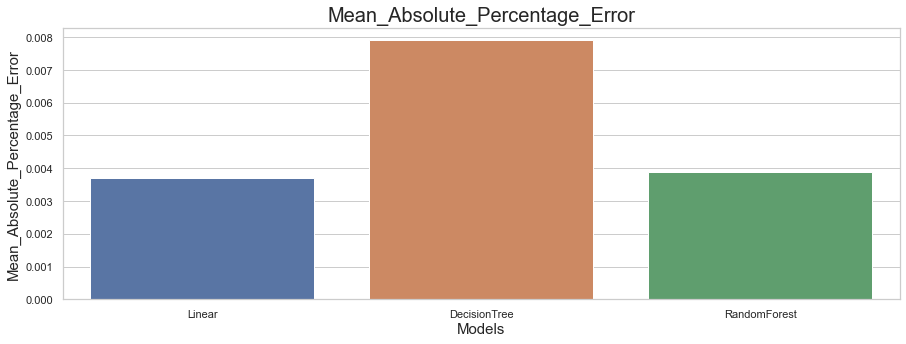

In [95]:
models = ['Linear', 'DecisionTree', 'RandomForest']
error = [0.0037, 0.0079, 0.0039]

# Visualizing the accuracy of all the classification models applied
plt.figure(figsize=(15,5))
plt.title('Mean_Absolute_Percentage_Error', fontsize=20)
# plt.yticks(np.arange(0, 2, 0.1))
plt.ylabel("Mean_Absolute_Percentage_Error",fontsize = 15)
plt.xlabel("Models", fontsize = 15)
sns.set_theme(style="whitegrid")
sns.barplot(models, error,)
plt.show()